In [2]:
import pandas as pd
import pycountry
import wbdata
import datetime
import statsmodels.formula.api as smf
import numpy as np
import pylab
import matplotlib
import matplotlib.pyplot as plt

<html> <center> <br> <br> <br> <br>  R&D department investment analysis for <font color = 'red'> <u> China   <br> <br> <br> <br> 

In [12]:
#R & D Investments as a % of GDP

R_D_Investments_China = pd.read_csv('CHINA_RD.csv') 

In [13]:
# Removing columns which are not necessary 

R_D_Investments_China = R_D_Investments_China.drop(['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis=1)




In [14]:
R_D_Investments_China

,LOCATION,TIME,Value
0,CHN,2000,0.893163
1,CHN,2001,0.940331
2,CHN,2002,1.057860
3,CHN,2003,1.120366
4,CHN,2004,1.214982
5,CHN,2005,1.307916
6,CHN,2006,1.368537
7,CHN,2007,1.373694
8,CHN,2008,1.445920
9,CHN,2009,1.664795


In [15]:
# Renaming a few columns
R_D_Investments_China.rename(columns ={'LOCATION': 'Code', 'Value': 'Millions', 'TIME': 'Time'}, inplace = True)

#R_D_Investments_2000  = R_D_Investments_1_2000[R_D_Investments_1_2000.Code != 'EU28'] 


R_D_China = R_D_Investments_China.query('Code == "CHN"')


len(R_D_China)


19

In [19]:
def load_from_wbdata(countries, indicators, year_from, year_to):
    """Create data frame for given list of countries, indicators and dates using World Bank API
    :param countries: list of codes
    :param indicators: dict {ind_code : ind_name}
    :param year_from: starting year
    :param year_to: ending year
    :returns df_data: multi index data frame
    """
    data_date = (datetime.datetime(year_from, 1, 1), datetime.datetime(year_to, 1, 1))
    df_data = wbdata.get_dataframe(indicators, country=countries, data_date=data_date, convert_date=False)
    return df_data

#get GDP PPP data (NY.GDP.PCAP.PP.KD - GDP per capita, PPP (constant 2011 international $))
#gdp_ppp = load_from_wbdata(countries_codes, {'NY.GDP.PCAP.PP.KD':'gdp_ppp'}, 2015, 2015)



gdp_ppp_china = load_from_wbdata('CHN', {'NY.GDP.PCAP.PP.KD':'gdp_ppp'}, 1990, 2018)


In [20]:
gdp_ppp_china.reset_index(level=0, inplace=True)

In [21]:
#gdp_ppp_germany.rename(index ={'date': 'Code'}, inplace = True)

In [22]:
gdp_ppp_china

,date,gdp_ppp
0,2018,16181.777716
1,2017,15253.993071
2,2016,14368.630801
3,2015,13534.846237
4,2014,12725.089099
5,2013,11919.607104
6,2012,11115.110675
7,2011,10355.495713
8,2010,9498.079744
9,2009,8626.532479


In [23]:
R_D_China.rename(columns ={'Time': 'date'}, inplace = True)

In [24]:
R_D_China

,Code,date,Millions
0,CHN,2000,0.893163
1,CHN,2001,0.940331
2,CHN,2002,1.057860
3,CHN,2003,1.120366
4,CHN,2004,1.214982
5,CHN,2005,1.307916
6,CHN,2006,1.368537
7,CHN,2007,1.373694
8,CHN,2008,1.445920
9,CHN,2009,1.664795


In [26]:
def merge_df_onCode(df_data1, df_data2):
    """Merge two data frames on Code column, drop double country column
    :param df_data1: data frame
    :param df_data2: data frame
    :returns df_joined: data frame"""
    df_joined = pd.merge(df_data1, df_data2.astype({'date': 'int64'}), on='date')
 #   df_joined.drop(['Country_y'], axis=1, inplace=True)
    return df_joined

#merge data 

combined_R_D_China = merge_df_onCode(R_D_China, gdp_ppp_china)

#combined_ODA_Production_2015_cleaned = merge_df_onCode(ODA_Production_2015_cleaned, gdp_ppp_prod)




In [27]:
combined_R_D_China_1 = combined_R_D_China.query('gdp_ppp >= 0')

In [28]:
combined_R_D_China_1

,Code,date,Millions,gdp_ppp
0,CHN,2000,0.893163,3689.967255
1,CHN,2001,0.940331,3968.773863
2,CHN,2002,1.057860,4302.226871
3,CHN,2003,1.120366,4704.586800
4,CHN,2004,1.214982,5149.601901
5,CHN,2005,1.307916,5702.800579
6,CHN,2006,1.368537,6392.373888
7,CHN,2007,1.373694,7264.060036
8,CHN,2008,1.445920,7924.644365
9,CHN,2009,1.664795,8626.532479


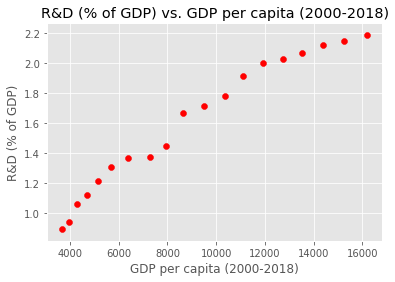

In [29]:
def show_scatterplot(df_data, variables, color, title, xlabel, ylabel):
    """Take df_data and plot for chosen columns in variables list
    :param df_data: data frame
    :param variables: list of strings
    :param color: string"""
    plt.scatter(x=df_data[variables[0]], y=df_data[variables[1]], color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
matplotlib.style.use('ggplot')
plot_combined_R_D_China = show_scatterplot(combined_R_D_China_1, ['gdp_ppp', 'Millions'], 'r',
                                    'R&D (% of GDP) vs. GDP per capita (2000-2018)', 'GDP per capita (2000-2018)',
                                    'R&D (% of GDP)')

In [30]:
column_1 = combined_R_D_China_1["Millions"]
column_2 = combined_R_D_China_1["gdp_ppp"]
correlation = column_1.corr(column_2)

In [31]:
correlation

0.9815859459211098

In [33]:
#perform OLS 
model_combined_R_D_China = smf.ols(formula='gdp_ppp ~ Millions', data=combined_R_D_China_1).fit()
model_combined_R_D_China.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gdp_ppp   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     448.9
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           1.16e-13
Time:                        13:39:33   Log-Likelihood:                -152.96
No. Observations:                  19   AIC:                             309.9
Df Residuals:                      17   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5548.7917    714.936     -7.761      0.000   -7057.175   -4040.408
Millions    9167.5065    432.693     21.187      0.000    8254.605    1.01e+04
==============================================================================
Omnibus:                        1.552   Durbin-Watson:                   0.462
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                1.321
Skew:                           0.567   Prob(JB):                        0.517
Kurtosis:                       2.383   Cond. No.                         8.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
#Using OLS for finding the p value and t statistics 
import statsmodels.api as sm

model = sm.OLS(combined_R_D_Germany_2['gdp_ppp'], combined_R_D_Germany_2[['Millions']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                gdp_ppp   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              9410.
Date:                Thu, 16 Apr 2020   Prob (F-statistic):                    8.19e-35
Time:                        13:10:12   Log-Likelihood:                         -244.05
No. Observations:                  27   AIC:                                      490.1
Df Residuals:                      26   BIC:                                      491.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Millions      1.5e+04    154.591     97.007      0.000    1.47e+04    1.53e+04
==============================================================================
Omnibus:                       26.553   Durbin-Watson:                   0.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.319
Skew:                          -2.000   Prob(JB):                     4.36e-12
Kurtosis:                       8.524   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R & D Investment in United Kingdom

In [34]:
#R & D Investments as a % of GDP

R_D_Investments_UK = pd.read_csv('R_D_all.csv') 

In [35]:
R_D_Investments_UK = R_D_Investments_UK.drop(['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis=1)

# Renaming a few columns
R_D_Investments_UK.rename(columns ={'LOCATION': 'Code', 'Value': 'Millions', 'TIME': 'Time'}, inplace = True)

#R_D_Investments_2000  = R_D_Investments_1_2000[R_D_Investments_1_2000.Code != 'EU28'] 


R_D_UK = R_D_Investments_UK.query('Code == "GBR"')


len(R_D_UK)


19

In [36]:
R_D_UK

,Code,Time,Millions
489,GBR,2000,1.617121
490,GBR,2001,1.604768
491,GBR,2002,1.614966
492,GBR,2003,1.582387
493,GBR,2004,1.533798
494,GBR,2005,1.552790
495,GBR,2006,1.573174
496,GBR,2007,1.612885
497,GBR,2008,1.612725
498,GBR,2009,1.671247


In [37]:
def load_from_wbdata(countries, indicators, year_from, year_to):
    """Create data frame for given list of countries, indicators and dates using World Bank API
    :param countries: list of codes
    :param indicators: dict {ind_code : ind_name}
    :param year_from: starting year
    :param year_to: ending year
    :returns df_data: multi index data frame
    """
    data_date = (datetime.datetime(year_from, 1, 1), datetime.datetime(year_to, 1, 1))
    df_data = wbdata.get_dataframe(indicators, country=countries, data_date=data_date, convert_date=False)
    return df_data

#get GDP PPP data (NY.GDP.PCAP.PP.KD - GDP per capita, PPP (constant 2011 international $))
#gdp_ppp = load_from_wbdata(countries_codes, {'NY.GDP.PCAP.PP.KD':'gdp_ppp'}, 2015, 2015)



gdp_ppp_uk = load_from_wbdata('GBR', {'NY.GDP.PCAP.PP.KD':'gdp_ppp'}, 2000, 2018)


In [38]:
gdp_ppp_uk 

,gdp_ppp
date,
2018,40522.246608
2017,40228.662972
2016,39760.494252
2015,39291.735769
2014,38693.893263
2013,37995.763895
2012,37449.779240
2011,37161.490687
2010,36885.028113


In [39]:

# Renaming a few column
gdp_ppp_uk.rename(index ={'date': 'Code'}, inplace = True)

In [40]:
gdp_ppp_uk.reset_index(level=0, inplace=True)

gdp_ppp_uk.rename(index ={'date': 'Code'}, inplace = True)

R_D_UK.rename(columns ={'Time': 'date'}, inplace = True)

C:\Users\prana\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [41]:
R_D_UK = R_D_UK.sort_values(by=['date'], ascending=False)

In [42]:
R_D_UK['date']

507    2018
506    2017
505    2016
504    2015
503    2014
502    2013
501    2012
500    2011
499    2010
498    2009
497    2008
496    2007
495    2006
494    2005
493    2004
492    2003
491    2002
490    2001
489    2000
Name: date, dtype: int64

In [43]:
def merge_df_onCode(df_data1, df_data2):
    """Merge two data frames on Code column, drop double country column
    :param df_data1: data frame
    :param df_data2: data frame
    :returns df_joined: data frame"""
    df_joined = pd.merge(df_data1, df_data2.astype({'date': 'int64'}), on='date')
 #   df_joined.drop(['Country_y'], axis=1, inplace=True)
    return df_joined

#merge data 

combined_R_D_UK = merge_df_onCode(R_D_UK, gdp_ppp_uk)

#combined_ODA_Production_2015_cleaned = merge_df_onCode(ODA_Production_2015_cleaned, gdp_ppp_prod)

In [44]:
combined_R_D_UK
combined_R_D_UK = combined_R_D_UK.sort_values(by=['date'])

In [45]:
combined_R_D_UK

,Code,date,Millions,gdp_ppp
18,GBR,2000,1.617121,33365.496061
17,GBR,2001,1.604768,34225.891848
16,GBR,2002,1.614966,34873.476452
15,GBR,2003,1.582387,35852.218610
14,GBR,2004,1.533798,36495.104697
13,GBR,2005,1.552790,37397.888412
12,GBR,2006,1.573174,38159.141263
11,GBR,2007,1.612885,38783.447118
10,GBR,2008,1.612725,38371.220522
9,GBR,2009,1.671247,36464.420182


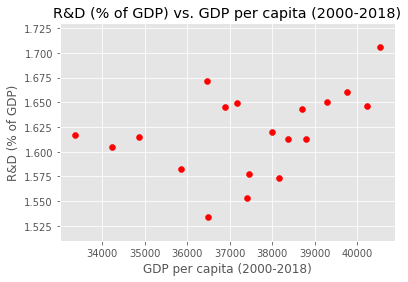

In [46]:
def show_scatterplot(df_data, variables, color, title, xlabel, ylabel):
    """Take df_data and plot for chosen columns in variables list
    :param df_data: data frame
    :param variables: list of strings
    :param color: string"""
    plt.scatter(x=df_data[variables[0]], y=df_data[variables[1]], color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
matplotlib.style.use('ggplot')
plot_combined_R_D_UK = show_scatterplot(combined_R_D_UK, ['gdp_ppp', 'Millions'], 'r',
                                    'R&D (% of GDP) vs. GDP per capita (2000-2018)', 'GDP per capita (2000-2018)',
                                    'R&D (% of GDP)')

In [47]:
#perform OLS 
model_combined_R_D_UK = smf.ols(formula='gdp_ppp ~ Millions', data=combined_R_D_UK).fit()
model_combined_R_D_UK.summary()

C:\Users\prana\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gdp_ppp   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     3.302
Date:                Thu, 16 Apr 2020   Prob (F-statistic):             0.0869
Time:                        14:07:37   Log-Likelihood:                -168.83
No. Observations:                  19   AIC:                             341.7
Df Residuals:                      17   BIC:                             343.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7534.6899   1.65e+04      0.457      0.653   -2.72e+04    4.23e+04
Millions    1.848e+04   1.02e+04      1.817      0.087   -2977.130    3.99e+04
==============================================================================
Omnibus:                        3.233   Durbin-Watson:                   0.361
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.519
Skew:                          -0.867   Prob(JB):                        0.284
Kurtosis:                       2.585   Cond. No.                         86.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R&D is not contributing to the GDP in UK

`R&D in USA`

In [48]:
#R & D Investments as a % of GDP

R_D_Investments_USA = pd.read_csv('R_D_all.csv') 

In [49]:
R_D_Investments_USA = R_D_Investments_USA.drop(['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis=1)

# Renaming a few columns
R_D_Investments_USA.rename(columns ={'LOCATION': 'Code', 'Value': 'Millions', 'TIME': 'Time'}, inplace = True)

#R_D_Investments_2000  = R_D_Investments_1_2000[R_D_Investments_1_2000.Code != 'EU28'] 


R_D_USA = R_D_Investments_USA.query('Code == "USA"')


len(R_D_USA)

19

In [50]:
R_D_USA

,Code,Time,Millions
508,USA,2000,2.628793
509,USA,2001,2.648296
510,USA,2002,2.559257
511,USA,2003,2.564546
512,USA,2004,2.502430
513,USA,2005,2.516968
514,USA,2006,2.557640
515,USA,2007,2.631606
516,USA,2008,2.767908
517,USA,2009,2.812699


In [51]:
def load_from_wbdata(countries, indicators, year_from, year_to):
    """Create data frame for given list of countries, indicators and dates using World Bank API
    :param countries: list of codes
    :param indicators: dict {ind_code : ind_name}
    :param year_from: starting year
    :param year_to: ending year
    :returns df_data: multi index data frame
    """
    data_date = (datetime.datetime(year_from, 1, 1), datetime.datetime(year_to, 1, 1))
    df_data = wbdata.get_dataframe(indicators, country=countries, data_date=data_date, convert_date=False)
    return df_data

#get GDP PPP data (NY.GDP.PCAP.PP.KD - GDP per capita, PPP (constant 2011 international $))
#gdp_ppp = load_from_wbdata(countries_codes, {'NY.GDP.PCAP.PP.KD':'gdp_ppp'}, 2015, 2015)



gdp_ppp_usa = load_from_wbdata('USA', {'NY.GDP.PCAP.PP.KD':'gdp_ppp'}, 2000, 2018)

In [52]:
gdp_ppp_usa

,gdp_ppp
date,
2018,55719.119981
2017,54470.796670
2016,53631.757624
2015,53187.573374
2014,52080.792568
2013,51208.892428
2012,50632.443448
2011,49883.113984
2010,49479.248679


In [54]:
# Renaming a few column
gdp_ppp_usa.rename(index ={'date': 'Code'}, inplace = True)

gdp_ppp_usa.reset_index(level=0, inplace=True)

gdp_ppp_usa.rename(index ={'date': 'Code'}, inplace = True)

R_D_USA.rename(columns ={'Time': 'date'}, inplace = True)

C:\Users\prana\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [56]:
R_D_USA = R_D_USA.sort_values(by=['date'], ascending=False)

In [57]:
R_D_USA['date']

526    2018
525    2017
524    2016
523    2015
522    2014
521    2013
520    2012
519    2011
518    2010
517    2009
516    2008
515    2007
514    2006
513    2005
512    2004
511    2003
510    2002
509    2001
508    2000
Name: date, dtype: int64

In [61]:
def merge_df_onCode(df_data1, df_data2):
    """Merge two data frames on Code column, drop double country column
    :param df_data1: data frame
    :param df_data2: data frame
    :returns df_joined: data frame"""
    df_joined = pd.merge(df_data1, df_data2.astype({'date': 'int64'}), on='date')
 #   df_joined.drop(['Country_y'], axis=1, inplace=True)
    return df_joined

#merge data 

combined_R_D_USA = merge_df_onCode(R_D_USA, gdp_ppp_usa)

In [62]:
combined_R_D_USA
combined_R_D_USA = combined_R_D_USA.sort_values(by=['date'])

In [63]:
combined_R_D_USA 

,Code,date,Millions,gdp_ppp
18,USA,2000,2.628793,45661.268667
17,USA,2001,2.648296,45662.934837
16,USA,2002,2.559257,46029.198996
15,USA,2003,2.564546,46941.003291
14,USA,2004,2.502430,48275.386104
13,USA,2005,2.516968,49512.926789
12,USA,2006,2.557640,50437.806235
11,USA,2007,2.631606,50897.731238
10,USA,2008,2.767908,50349.715322
9,USA,2009,2.812699,48644.151110


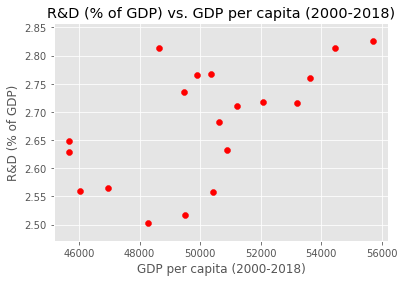

In [64]:
def show_scatterplot(df_data, variables, color, title, xlabel, ylabel):
    """Take df_data and plot for chosen columns in variables list
    :param df_data: data frame
    :param variables: list of strings
    :param color: string"""
    plt.scatter(x=df_data[variables[0]], y=df_data[variables[1]], color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
matplotlib.style.use('ggplot')
plot_combined_R_D_USA = show_scatterplot(combined_R_D_USA, ['gdp_ppp', 'Millions'], 'r',
                                    'R&D (% of GDP) vs. GDP per capita (2000-2018)', 'GDP per capita (2000-2018)',
                                    'R&D (% of GDP)')

In [65]:
#perform OLS 
model_combined_R_D_USA = smf.ols(formula='gdp_ppp ~ Millions', data=combined_R_D_USA).fit()
model_combined_R_D_USA.summary()

C:\Users\prana\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gdp_ppp   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     9.720
Date:                Thu, 16 Apr 2020   Prob (F-statistic):            0.00626
Time:                        16:50:00   Log-Likelihood:                -173.61
No. Observations:                  19   AIC:                             351.2
Df Residuals:                      17   BIC:                             353.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4757.1385   1.46e+04      0.327      0.748    -2.6e+04    3.55e+04
Millions    1.694e+04   5432.206      3.118      0.006    5475.263    2.84e+04
==============================================================================
Omnibus:                        3.369   Durbin-Watson:                   0.397
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                1.678
Skew:                          -0.418   Prob(JB):                        0.432
Kurtosis:                       1.808   Cond. No.                         81.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`R&D is not contributing to GDP`